# <center><b> MGP2: Site Energy Usage Intensity Project <b></center>

---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)
  - **4.3** [**Exploratory Data Analysis on pre-processed data**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Handling of Redundant Data**](#Section53)<br>
  - **5.4** [**Handling of Inconsisten Data**](#Section54)<br>
  - **5.5** [**Handling of Outliers**](#Section55)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
  
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation using Machine Learning**](#Section8)<br>
  - **8.1** [**Baseline Model Evaluation**](#Section81)<br> 
  

**9.** [**Model Evaluation using Hyperparameter Tuning**](#Section9)<br>

**10.** [**Summary**](#Section10)<br>

**11.** [**Explainable AI**](#Section11)<br>
  - **11.1** [**Importing Libraries for  Explainable AI**](#Section111)
 

---
<a name = Section1></a>
# **1. Introduction**
---


🧾**Description:** According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. 

The dataset consists of building characteristics, weather data for the location of the building, as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to a single building observed in a given year.


---
<a name = Section1></a>
# **2. Problem Statement**
---


Problem Statement: You are provided with two datasets: 
- (1) the train_dataset where the observed values of the Site EUI for each row are provided and
- (2) the x_test dataset the observed values of the Site EUI for each row are removed and provided separately in y_test.

Your task is to predict the Site EUI for each row (using the complete training dataset), given the characteristics of the building and the weather data for the location of the building.

- Use the test sets for validation and testing. 

- The target variable is site_eui and the evaluation metric is RMSE score.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**                                                   
---

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport     
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from collections import Counter  
import seaborn as sns
import warnings                                                     
warnings.filterwarnings("ignore")
import datetime
plt.show();
from platform import python_version
import sklearn
from sklearn import metrics
from tqdm import tqdm
import gc
from sklearn.metrics import roc_curve, auc
import urllib
from urllib.request import urlopen
import urllib.request as ur

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV ,train_test_split            
from sklearn.metrics import classification_report, plot_confusion_matrix                   
import pydotplus                                                    
from IPython.display import Image                                   
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel                      
from yellowbrick.model_selection import FeatureImportances  
from imblearn.over_sampling import SMOTE
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import optuna
import shap
import time
from sklearn import metrics

In [3]:
pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
style.use('ggplot')
sns.set_palette('Set2')

<a name = Section31></a>
### **3.2 Version Check**

In [4]:
# Printing versions of Python and other packages  to ensure correct version is used for this project
print("python version", python_version())
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)
print ("Shap version", shap.__version__)

python version 3.8.8
pandas version 1.2.2
numpy version 1.20.1
seaborn version 0.11.1
sklearn version 1.0.2
Shap version 0.36.0


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
|**Site Energy Usage Intensity (Site EUI) data**| 75757 | 63 | 37 MB |

<br>


|Sr| Column name | Description ||Sr| Column name | Description |
|:--|:--|:--||:--|:--|:--|
|1|**id**| building id ||17|**Year_Factor**|anonymized year in which the weather and energy usage factors were observed|
|2|**State_Factor**| anonymized state in which the building is located||18|**building_class**| building classification|
|3|**facility_type**| building usage type||19|**floor_area**| floor area (in square feet) of the building|
|4|year_built| year in which the building was constructed||20|**energy_star_rating**| the energy star rating of the building
|5|**ELEVATION**| elevation of the building location||21|**january_min_temp**| minimum temperature in January (in Fahrenheit) at the location of the building|
|6|**january_avg_temp**|average temperature in January (in Fahrenheit) at the location of the building||22|**january_max_temp**| maximum temperature in January (in Fahrenheit) at the location of the building|
|7|**cooling_degree_days**|cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.||23|**heating_degree_days**| heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.|
|8|**precipitation_inches**| annual precipitation in inches at the location of the building||24|**snowfall_inches**| annual snowfall in inches at the location of the building|
|9|**snowdepth_inches**| annual snow depth in inches at the location of the building||25|**avg_temp**| average temperature over a year at the location of the building|
|10|**ays_below_30F**| total number of days below 30 degrees Fahrenheit at the location of the building||26|**ays_below_20F**| total number of days below 20 degrees Fahrenheit at the location of the building.|
|11|**days_below_10F**| total number of days below 10 degrees Fahrenheit at the location of the building||27|**days_below_0F**| total number of days below 0 degrees Fahrenheit at the location of the building|
|12|**days_above_80F**| total number of days above 80 degrees Fahrenheit at the location of the building||28|**days_above_90**| total number of days above 90 degrees Fahrenheit at the location of the building|
|13|**days_above_100F**| total number of days above 100 degrees Fahrenheit at the location of the building||29|**days_above_110F**| total number of days above 110 degrees Fahrenheit at the location of the building.|
|14|**direction_max_wind_speed**| wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.)||30|**direction_peak_wind_speed**|wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).|
|15|**max_wind_speed**| maximum wind speed at the location of the building||31|**days_with_fog**| number of days with fog at the location of the building|
|16|**Target variable : site_eui**| Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills|

In [5]:
# loading the data set
df = pd.read_csv("../dataset/train_dataset.csv")
df = df.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
# loading the test data set
dftest = pd.read_csv("../dataset/x_test.csv")
dftest = dftest.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
print(dftest.shape)
dftest.head()

(9705, 63)


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [7]:
ynewtest = pd.read_csv("../dataset/y_test.csv")
print(ynewtest.shape)
ynewtest.head()

(9705, 2)


,id,site_eui
0,75757,166.588554
1,75758,259.381565
2,75759,158.537090
3,75760,261.441520
4,75761,242.967711


In [8]:
df['facility_type'].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [10]:
df.shape

(75757, 64)

In [11]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

<a name = Section42></a>
### 4.2 Data Description 

- In this section we will get **information about the data** and see some observations.          

In [12]:
df.describe().style.highlight_null(null_color = 'lime')

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,75757.000000,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,165983.865858,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,246875.790940,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,943.000000,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,62379.000000,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [13]:
df.describe(include="object")

,State_Factor,building_class,facility_type
count,75757,75757,75757
unique,7,2,60
top,State_6,Residential,Multifamily_Uncategorized
freq,50840,43558,39455


**Observations:**

- Total count/ records are  **12316** in the data.

- There are quite a no of   missing values in various columns.

<a name = Section43></a>
### 4.3 Exploratory Data Analysis on pre-processed data .

- In this section we will study **the patterns about the data** and list some of our observations.          

Text(0.5, 0.98, 'scatter  plots for the year factor vs site energy used')

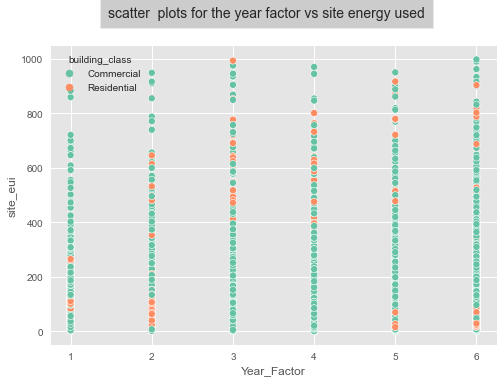

In [14]:
sns.scatterplot(data = df, x = 'Year_Factor', y = 'site_eui', hue = 'building_class')
plt.suptitle('scatter  plots for the year factor vs site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

Text(0.5, 0.98, 'scatter  plots for the year built vs site energy used')

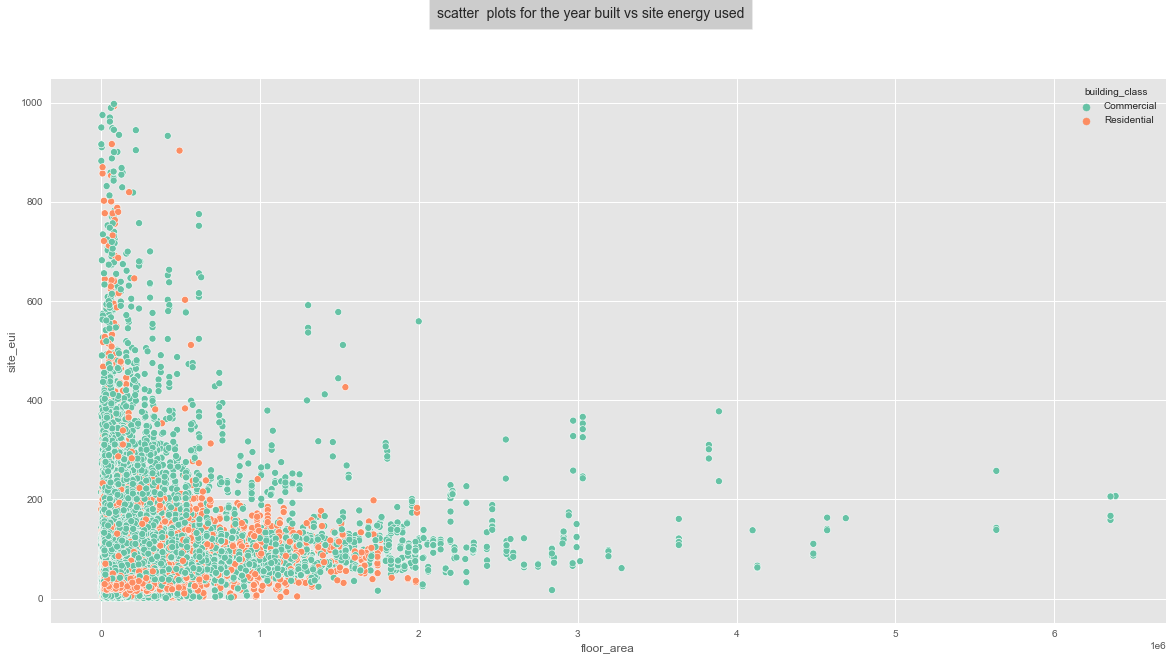

In [15]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x = 'floor_area', y = 'site_eui', hue = 'building_class')
plt.suptitle('scatter  plots for the year built vs site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

Text(0.5, 0.98, 'Hist plots for the site energy used')

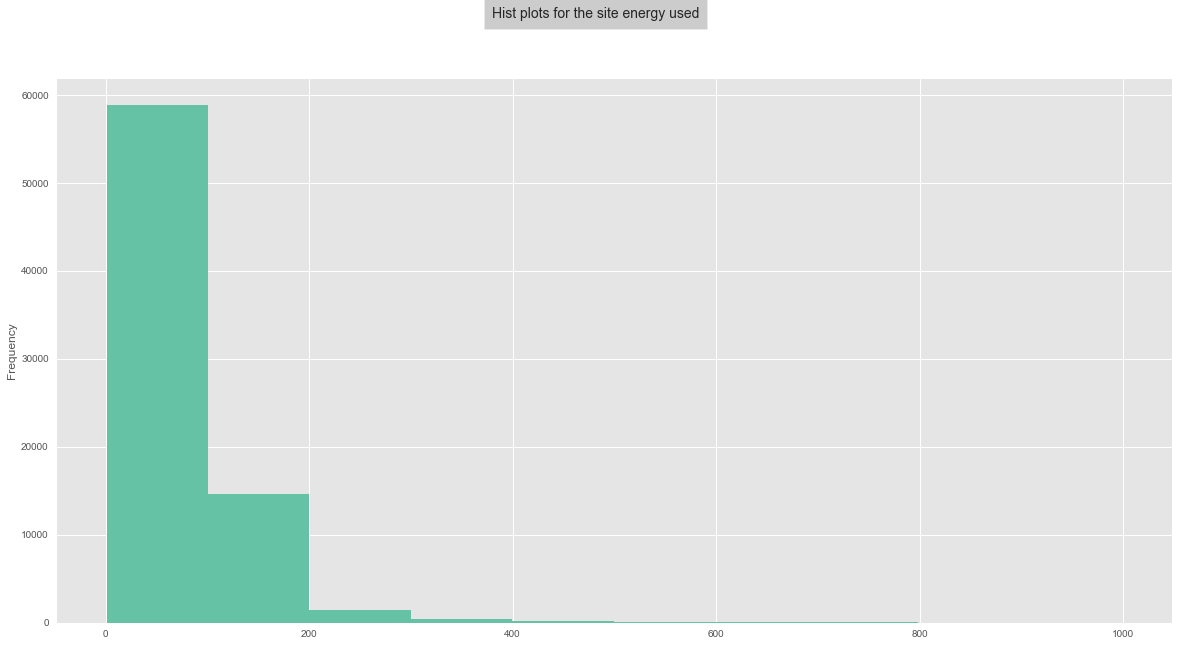

In [17]:
fig = plt.figure(figsize=(20,10))
df.site_eui.plot(kind='hist')
plt.suptitle('Hist plots for the site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

**Observations:**

- To plot the box plot and observe the pattern of data

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data = df.sample(10000), x = "site_eui", y ="year_built")
plt.suptitle('Box plots for the year built vs site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

**Observations:**

- To find out the distribution of the site eui vs elevation lets plot it and observe the pattern


In [ ]:
fig = plt.figure(figsize=(20,10))
(df.groupby(['site_eui'])['ELEVATION'].sum()/df.groupby(['site_eui'])['ELEVATION'].count()).plot(kind='bar');
plt.suptitle('Bar plots for the elevation  vs site energy used',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

- What is the distribution of facility type data ?

In [ ]:
fig = plt.figure(figsize=(20,10))
df.groupby(['facility_type'])['facility_type'].count().sort_values(ascending=False).plot(kind='bar')
plt.suptitle('Bar plots for the facility type ',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

In [ ]:
fig = plt.figure(figsize=(20,10))
df.site_eui.plot(kind='kde')
plt.suptitle('KDE plot for the site energy used index',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.distplot(df['january_max_temp'])
plt.suptitle('Plot for the distribution of max temp in january',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [19]:
# Only for columns of train data set
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [20]:
# Only for columns of test data set
dftest.columns = dftest.columns.str.lower().str.replace(' ', '_')

In [21]:
profile1 = ProfileReport(df=df)
profile1.to_file(output_file='siteco.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


<a name = Section52></a>
### **5.2  Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [21]:
# Check for any missing values
print(any(df.isna().sum()))

True


**Observations:**
-  Looks like there are missing values in the  dataset.

In [22]:
# Check for any missing values
#print(df[df.isna().any(axis=1)])
print(len(df[df.isna().any(axis=1)]))

64448


**Observations:**

-  As we had observed there are missing values in the train dataset. 
- There are approx __*64448*__ missing values in the train dataset.

In [23]:
# Check for any missing values
print(any(dftest.isna().sum()))

True


In [24]:
# Check for any missing values
print(len(dftest[dftest.isna().any(axis=1)]))

9327


**Observations:**

-  As we had observed there are missing values in the test dataset. 
- There are approx __*9327*__ missing values in the test dataset.

In [25]:
null_frame = pd.DataFrame(index = df.columns.values)
null_frame['Null Frequency'] = df.isnull().sum().values
percent = df.isnull().sum().values/df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.T

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Null Frequency,0.0,0.0,0.0,0.0,0.0,1837.00,26709.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41082.00,41811.00,41082.00,45796.00,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,2.42,35.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.23,55.19,54.23,60.45,0.0,0.0


**Observations:**
- Total % for missing values for energy rating is 35%.

In [26]:
# For testing dataset
null_frametest = pd.DataFrame(index = dftest.columns.values)
null_frametest['Null Frequency'] = dftest.isnull().sum().values
percent = dftest.isnull().sum().values/dftest.shape[0]
null_frametest['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frametest.T

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
Null Frequency,0.0,0.0,0.0,0.0,0.0,92.00,2254.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8575.00,8575.00,8575.00,9117.00,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.95,23.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.36,88.36,88.36,93.94,0.0


**Observations:**
- Total % for missing values for energy rating is 23%.

In [23]:
df[df['direction_max_wind_speed'].isnull()]['elevation'].unique()

array([  59.1,  120.1,   18.6,   45.7,   29.6,  131.1,    3. ,  958.6,
        210.3, 1380.7,  186.8,   92. ,   61. ,  123.1,  796.1,  506.6,
        101.5,   25.9,  113.4,    6.1,  116.7,   13.1,   47.5,  312.7,
        135.3,  825.7,  169.2,   89.9,  209.1,   73.8,  123.7,   73.5,
        320.3,   -6.4,   46.3,  424.9,  197.8,  396.5,  771.8,  256.3,
        289.3,  227.1,  420.3,  225.2,  194.5,  240.8,  275.5,  472.4,
       1607.5,  177.4,  926.3,   72.2,   40.5,   25.6,    5.2,   97.2,
         75.3,  126.2,   36.6,   23.8,   48.5,   16.5,    8.2,    2.1,
         69.2,  104.9,    9.1,    2.4,  120.4,   62.5,   52.7,   84.4,
         44.2,  210.9,   12.2,   44.5,   68.6,   11.6,  121.6,   29.3,
        243.8,  181.4,   64. , 1478.3,   82.9,  144.8,   23.5,  661.1,
         17.1,    4.3,   88.7,  209.4,  413.6,  365.8,  417.6,  438.6,
         67.1,   71.6,  201.5,   52.1,   53. ,  431.3,  199.6,  154.2,
        688.8,   22.9,  932.7,   93.9,   68. ,   74.7,   36. ,  114.3,
      

In [27]:
# Stats of dataframe
stats    = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
61,days_with_fog,42,60.451179,60.451179,float64
59,direction_peak_wind_speed,8,55.190939,55.190939,float64
60,max_wind_speed,16,54.228652,54.228652,float64
58,direction_max_wind_speed,10,54.228652,54.228652,float64
6,energy_star_rating,101,35.256148,35.256148,float64
...,...,...,...,...,...
27,july_avg_temp,161,0.000000,17.179931,float64
28,july_max_temp,41,0.000000,39.781142,int64
29,august_min_temp,31,0.000000,42.357802,int64
30,august_avg_temp,167,0.000000,17.179931,float64


**Observations:**

-  There are some missing values in the six columns of the  dataset. Now lets remove the missing values

In [28]:
# Dimentions of data
dftest.shape

(9705, 63)

In [29]:
# For trainin dataset
for c in df.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if df[c].isna().sum() != 0:
        #print(c)
        med_c = df[c].median()
        print(med_c)
        df[c]=df[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))

col is year_factor
col is floor_area
col is year_built
1951.0
col is energy_star_rating
67.0
col is elevation
col is january_min_temp
col is january_avg_temp
col is january_max_temp
col is february_min_temp
col is february_avg_temp
col is february_max_temp
col is march_min_temp
col is march_avg_temp
col is march_max_temp
col is april_min_temp
col is april_avg_temp
col is april_max_temp
col is may_min_temp
col is may_avg_temp
col is may_max_temp
col is june_min_temp
col is june_avg_temp
col is june_max_temp
col is july_min_temp
col is july_avg_temp
col is july_max_temp
col is august_min_temp
col is august_avg_temp
col is august_max_temp
col is september_min_temp
col is september_avg_temp
col is september_max_temp
col is october_min_temp
col is october_avg_temp
col is october_max_temp
col is november_min_temp
col is november_avg_temp
col is november_max_temp
col is december_min_temp
col is december_avg_temp
col is december_max_temp
col is cooling_degree_days
col is heating_degree_days
co

In [30]:
for co in df.select_dtypes(include=['object']):
    #print("col is",co)
    if df[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = df[co].mode()[0]
        print(med_co)
        df[co]=df[co].replace(to_replace=np.nan, value=med_co) 

In [31]:
df.isna().sum()

year_factor                  0
state_factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
site_eui                     0
id                           0
Length: 64, dtype: int64

In [32]:
# For testing dataset
for c in dftest.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if dftest[c].isna().sum() != 0:
        #print(c)
        med_c = dftest[c].median()
        print(med_c)
        dftest[c]=dftest[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        dftest[c] = dftest[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        dftest[c] = dftest[c].apply(lambda x: round(x, decimals))

col is year_factor
col is floor_area
col is year_built
1969.0
col is energy_star_rating
72.0
col is elevation
col is january_min_temp
col is january_avg_temp
col is january_max_temp
col is february_min_temp
col is february_avg_temp
col is february_max_temp
col is march_min_temp
col is march_avg_temp
col is march_max_temp
col is april_min_temp
col is april_avg_temp
col is april_max_temp
col is may_min_temp
col is may_avg_temp
col is may_max_temp
col is june_min_temp
col is june_avg_temp
col is june_max_temp
col is july_min_temp
col is july_avg_temp
col is july_max_temp
col is august_min_temp
col is august_avg_temp
col is august_max_temp
col is september_min_temp
col is september_avg_temp
col is september_max_temp
col is october_min_temp
col is october_avg_temp
col is october_max_temp
col is november_min_temp
col is november_avg_temp
col is november_max_temp
col is december_min_temp
col is december_avg_temp
col is december_max_temp
col is cooling_degree_days
col is heating_degree_days
co

In [33]:
for co in dftest.select_dtypes(include=['object']):
    #print("col is",co)
    if dftest[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = dftest[co].mode()[0]
        print(med_co)
        dftest[co]=dftest[co].replace(to_replace=np.nan, value=med_co) 

In [34]:
dftest.isna().sum()

year_factor                  0
state_factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
direction_max_wind_speed     0
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
id                           0
Length: 63, dtype: int64

In [35]:
print(df.shape)
print(dftest.shape)

(75757, 64)
(9705, 63)


<a name = Section53></a>
### **5.3 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [36]:
#check if any duplicate row
print('Data have  Duplicate Rows?', df.duplicated().any())

Data have  Duplicate Rows? False


In [37]:
#To get the total count of duplicate values.
df.duplicated().sum()

0

In [38]:
# We will start by first removing the duplicate rows if there are any
if df.duplicated().any() : 
    df.drop_duplicates(keep="first", inplace=True)

<a name = Section54></a>
### **5.4 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

- Previously, we observed that **Timestamp** feature was **incorrectly indentified** as Object, so, we will rectify it.

- Additionally, we can observe that some features are having language of different format such as brand and model.

In [39]:
df['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [41]:
first_column = df.pop('id')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'id', first_column)
  
print()
print("After Shifting column to first position :")
df.columns


After Shifting column to first position :


Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfa

In [42]:
df[df['building_class']=="Residential"]['year_built'].value_counts()

1927.0    1463
1928.0    1462
1929.0    1399
1930.0    1190
1926.0    1120
          ... 
1874.0       1
1873.0       1
1845.0       1
1815.0       1
1870.0       1
Name: year_built, Length: 150, dtype: int64

In [43]:
# Learn more about the variable brand.
print("Distinct responses for building_class (Frequency):", len(set(df['building_class'])))
print("Distinct responses for building_class:", set(df['building_class']))  

Distinct responses for building_class (Frequency): 2
Distinct responses for building_class: {'Commercial', 'Residential'}


**Observations:**

-  There are no 2 type of building class 

In [44]:
first_column = dftest.pop('id')
  
# insert column using insert(position,column_name,
# first_column) function
dftest.insert(0, 'id', first_column)
  
print()
print("After Shifting column to first position in the testing dataset :")
dftest.columns


After Shifting column to first position in the testing dataset :


Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfa

In [45]:
# by minimum
min = pd.Series([col for col in df.columns if '_min_temp' in col])
#print(min)
df['mintempjandec'] = df[min].sum(axis=1)
df['mintempjandec'] = df['mintempjandec']/12
# by maximum
max = pd.Series([col for col in df.columns if '_max_temp' in col])
df['maxtempjandec'] = df[max].sum(axis=1)
df['maxtempjandec'] = df['maxtempjandec']/12
# by average
avg = pd.Series([col for col in df.columns if '_avg_temp' in col])
df['avgtempjandec'] = df[avg].sum(axis=1)
df['avgtempjandec'] = df['avgtempjandec']/12

In [46]:
df['heating_degree_days'] = df['heating_degree_days']/12
df['cooling_degree_days'] = df['cooling_degree_days']/12

In [47]:
df.head()

,id,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,mintempjandec,maxtempjandec,avgtempjandec
0,0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.59,73,40,53.69,80,41,55.5,78,46,56.85,84,50,60.5,90,52,62.73,84,52,62.16,85,52,64.65,90,47,63.02,83,43,53.8,72,36,49.27,71,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,248.68,44.166667,79.833333,56.938333
1,1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.59,73,40,53.69,80,41,55.5,78,46,56.85,84,50,60.5,90,52,62.73,84,52,62.16,85,52,64.65,90,47,63.02,83,43,53.8,72,36,49.27,71,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,26.50,44.166667,79.833333,56.938333
2,2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.59,73,40,53.69,80,41,55.5,78,46,56.85,84,50,60.5,90,52,62.73,84,52,62.16,85,52,64.65,90,47,63.02,83,43,53.8,72,36,49.27,71,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,24.69,44.166667,79.833333,56.938333
3,3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.59,73,40,53.69,80,41,55.5,78,46,56.85,84,50,60.5,90,52,62.73,84,52,62.16,85,52,64.65,90,47,63.02,83,43,53.8,72,36,49.27,71,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,48.41,44.166667,79.833333,56.938333
4,4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.59,73,40,53.69,80,41,55.5,78,46,56.85,84,50,60.5,90,52,62.73,84,52,62.16,85,52,64.65,90,47,63.02,83,43,53.8,72,36,49.27,71,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,3.90,44.166667,79.833333,56.938333


In [48]:
df.drop(columns=['january_min_temp', 'january_avg_temp', 'january_max_temp',
                'february_min_temp', 'february_avg_temp', 'february_max_temp',
                'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
               'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
                'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
               'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
               'august_avg_temp', 'august_max_temp', 'september_min_temp',
               'september_avg_temp', 'september_max_temp', 'october_min_temp',
               'october_avg_temp', 'october_max_temp', 'november_min_temp',
               'november_avg_temp', 'november_max_temp', 'december_min_temp',
               'december_avg_temp', 'december_max_temp'], axis =1, inplace = True)

In [49]:
df.head()

,id,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,mintempjandec,maxtempjandec,avgtempjandec
0,0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,248.68,44.166667,79.833333,56.938333
1,1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,26.50,44.166667,79.833333,56.938333
2,2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,24.69,44.166667,79.833333,56.938333
3,3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,48.41,44.166667,79.833333,56.938333
4,4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,3.90,44.166667,79.833333,56.938333


In [50]:
# by minimum
min = pd.Series([col for col in dftest.columns if '_min_temp' in col])
#print(min)
dftest['mintempjandec'] = dftest[min].sum(axis=1)
dftest['mintempjandec'] = dftest['mintempjandec']/12
# by maximum
max = pd.Series([col for col in dftest.columns if '_max_temp' in col])
dftest['maxtempjandec'] = dftest[max].sum(axis=1)
dftest['maxtempjandec'] = dftest['maxtempjandec']/12
# by average
avg = pd.Series([col for col in dftest.columns if '_avg_temp' in col])
dftest['avgtempjandec'] = dftest[avg].sum(axis=1)
dftest['avgtempjandec'] = dftest['avgtempjandec']/12

In [51]:
dftest['heating_degree_days'] = dftest['heating_degree_days']/12
dftest['cooling_degree_days'] = dftest['cooling_degree_days']/12

In [52]:
dftest.drop(columns=['january_min_temp', 'january_avg_temp', 'january_max_temp',
                'february_min_temp', 'february_avg_temp', 'february_max_temp',
                'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
               'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
                'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
               'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
               'august_avg_temp', 'august_max_temp', 'september_min_temp',
               'september_avg_temp', 'september_max_temp', 'october_min_temp',
               'october_avg_temp', 'october_max_temp', 'november_min_temp',
               'november_avg_temp', 'november_max_temp', 'december_min_temp',
               'december_avg_temp', 'december_max_temp'], axis =1, inplace = True)

In [53]:
dftest.head()

,id,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,mintempjandec,maxtempjandec,avgtempjandec
0,75757,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,28.5,176.0,25.24,0.0,0,59.89,0,0,0,0,29,5,2,0,330.0,320.0,18.3,129.0,46.166667,81.0,59.8775
1,75758,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,28.5,176.0,25.24,0.0,0,59.89,0,0,0,0,29,5,2,0,330.0,320.0,18.3,129.0,46.166667,81.0,59.8775
2,75759,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,28.5,176.0,25.24,0.0,0,59.89,0,0,0,0,29,5,2,0,330.0,320.0,18.3,129.0,46.166667,81.0,59.8775
3,75760,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,28.5,176.0,25.24,0.0,0,59.89,0,0,0,0,29,5,2,0,330.0,320.0,18.3,129.0,46.166667,81.0,59.8775
4,75761,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,28.5,176.0,25.24,0.0,0,59.89,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,46.166667,81.0,59.8775


In [54]:
gc.collect()

489

In [55]:
# Get list of categorical variables,date  and numerical variables for the data set
catcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset are = ", catcol, ". No of categorical columns = ", len(catcol))
print()
datecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset are = ", datecol, ". ,No of datetime columns = ", len(datecol))
print()
numcols = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset  are = ", numcols, ". No of numerical columns = ", len(numcols))

Categorical cols of dataset are =  ['state_factor', 'building_class', 'facility_type'] . No of categorical columns =  3

DateTime cols of dataset are =  [] . ,No of datetime columns =  0

Numerical cols of dataset  are =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical columns =  28


In [54]:
df[numcols].skew().sort_values(key=abs, ascending=False)[:10]

days_above_110f              84.615712
days_above_100f              23.496211
year_built                  -12.007872
elevation                     7.102841
floor_area                    6.607210
days_below_0f                 4.740918
site_eui                      4.739975
days_above_90f                3.133425
direction_peak_wind_speed     3.051837
max_wind_speed                2.940150
dtype: float64

In [56]:
skewed = ['days_above_110f', 'days_above_100f']

for var in skewed:
    
    # map the variable values into 0 and 1
    df[var] = np.where(df[var]==0, 0, 1)

In [57]:
df[numcols].skew().sort_values(key=abs, ascending=False)[:10]

days_above_110f              35.198976
year_built                  -12.007872
elevation                     7.102841
floor_area                    6.607210
days_below_0f                 4.740918
site_eui                      4.739975
days_above_100f               3.961531
days_above_90f                3.133425
direction_peak_wind_speed     3.051837
max_wind_speed                2.940150
dtype: float64

In [58]:
# Get list of categorical variables,date  and numerical variables for the testing  set
catcoltest = [col for col in dftest.columns if dftest[col].dtype == "object"]
print("Categorical cols of test dataset are = ", catcoltest, ". No of categorical columns = ", len(catcoltest))
print()
datecoltest =[col for col in dftest.columns if dftest[col].dtype == "datetime64[ns]"]
print("DateTime cols of test dataset are = ", datecoltest, ". ,No of datetime columns = ", len(datecoltest))
print()
numcolstest = [col for col in dftest.columns if (dftest[col].dtype != "object") & (dftest[col].dtype != "datetime64[ns]")]
print("Numerical cols of  test dataset  are = ", numcolstest, ". No of numerical columns = ", len(numcolstest))

Categorical cols of test dataset are =  ['state_factor', 'building_class', 'facility_type'] . No of categorical columns =  3

DateTime cols of test dataset are =  [] . ,No of datetime columns =  0

Numerical cols of  test dataset  are =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical columns =  27


In [59]:
dftest[numcolstest].skew().sort_values(key=abs, ascending=False)[:10]

snowdepth_inches             12.601759
year_built                  -11.892399
floor_area                    7.290691
days_with_fog                 5.348793
direction_max_wind_speed     -4.931270
direction_peak_wind_speed    -4.107702
snowfall_inches               2.794960
days_above_100f               2.563246
precipitation_inches          2.145557
elevation                     1.622391
dtype: float64

In [60]:
# Check and clean dirtiness in categorical data of the gender_age_train  dataset
for d in catcol:
    print('{} has {} unique values.'.format(d, df[d].unique()))
    print('{} has {} unique values.'.format(d, df[d].nunique()))
    print("\n")

state_factor has ['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11'] unique values.
state_factor has 7 unique values.


building_class has ['Commercial' 'Residential'] unique values.
building_class has 2 unique values.


facility_type has ['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Ga

facility_type
Multifamily_Uncategorized          39455
Office_Uncategorized               12512
Education_Other_classroom           3860
Lodging_Hotel                       2098
2to4_Unit_Building                  1893
Commercial_Other                    1744
5plus_Unit_Building                 1273
Warehouse_Nonrefrigerated           1255
Retail_Uncategorized                1130
Education_College_or_university     1056
dtype: int64


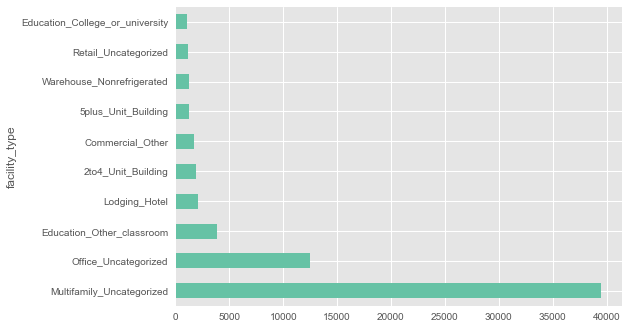

In [61]:
facility_types = df.groupby('facility_type').size().sort_values(ascending=False)
#plot barchart
facility_types.head(10).plot.barh()
#print raw numbers
print(facility_types.head(10))

In [64]:
for col in numcols:
    print("Min value odf ",col, "is =",  df[col].min, "Max value is ", df[col].max)

Min value of  id is = <bound method NDFrame._add_numeric_operations.<locals>.min of 0            0
1            1
2            2
3            3
4            4
         ...  
75752    75752
75753    75753
75754    75754
75755    75755
75756    75756
Name: id, Length: 75757, dtype: int64> Max value is  <bound method NDFrame._add_numeric_operations.<locals>.max of 0            0
1            1
2            2
3            3
4            4
         ...  
75752    75752
75753    75753
75754    75754
75755    75755
75756    75756
Name: id, Length: 75757, dtype: int64>
Min value of  year_factor is = <bound method NDFrame._add_numeric_operations.<locals>.min of 0        1
1        1
2        1
3        1
4        1
        ..
75752    6
75753    6
75754    6
75755    6
75756    6
Name: year_factor, Length: 75757, dtype: int64> Max value is  <bound method NDFrame._add_numeric_operations.<locals>.max of 0        1
1        1
2        1
3        1
4        1
        ..
75752    6
75753    6
75754 

Name: days_above_100f, Length: 75757, dtype: int32>
Min value of  days_above_110f is = <bound method NDFrame._add_numeric_operations.<locals>.min of 0        0
1        0
2        0
3        0
4        0
        ..
75752    0
75753    0
75754    0
75755    0
75756    0
Name: days_above_110f, Length: 75757, dtype: int32> Max value is  <bound method NDFrame._add_numeric_operations.<locals>.max of 0        0
1        0
2        0
3        0
4        0
        ..
75752    0
75753    0
75754    0
75755    0
75756    0
Name: days_above_110f, Length: 75757, dtype: int32>
Min value of  direction_max_wind_speed is = <bound method NDFrame._add_numeric_operations.<locals>.min of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
75752    1.0
75753    1.0
75754    1.0
75755    1.0
75756    1.0
Name: direction_max_wind_speed, Length: 75757, dtype: float64> Max value is  <bound method NDFrame._add_numeric_operations.<locals>.max of 0        1.0
1        1.0
2        1.0
3 

In [65]:
df.describe()

,id,year_factor,floor_area,year_built,energy_star_rating,elevation,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,mintempjandec,maxtempjandec,avgtempjandec
count,75757.000000,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,37878.000000,4.367755,1.659839e+05,1952.275077,63.146838,39.506323,100.187537,360.413116,42.430651,29.136379,164.862455,56.178220,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.053658,0.000805,31.004343,28.683026,2.460381,106.033621,82.584707,36.007563,79.050977,56.076862
std,21869.306509,1.471441,2.468758e+05,36.602159,23.238351,60.656596,32.630148,68.697227,10.592205,17.810894,175.275869,2.243178,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,0.225344,0.028365,94.546574,92.479537,4.649782,31.982643,58.255413,4.263049,2.721045,2.259148
min,0.000000,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,0.000000,33.166667,0.000000,0.000000,0.000000,44.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.000000,16.250000,66.000000,44.334167
25%,18939.000000,3.000000,6.237900e+04,1927.000000,56.000000,11.900000,94.000000,331.500000,39.350000,9.600000,10.000000,55.150000,22.000000,5.000000,0.000000,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,54.530000,35.333333,77.583333,55.137500
50%,37878.000000,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,106.416667,361.416667,42.170000,31.600000,101.000000,56.840000,50.000000,11.000000,2.000000,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.290000,36.250000,79.166667,56.638333
75%,56817.000000,6.000000,1.660000e+05,1976.000000,76.000000,42.700000,124.083333,389.166667,46.320000,49.100000,377.000000,57.220000,66.000000,26.000000,7.000000,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,97.280000,38.916667,80.083333,57.160833
max,75756.000000,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,412.333333,660.750000,107.690000,127.300000,1292.000000,77.250000,170.000000,93.000000,59.000000,31.000000,260.000000,185.000000,1.000000,1.000000,360.000000,360.000000,23.300000,311.000000,997.870000,55.750000,100.916667,77.179167


In [ ]:
df.groupby('direction_max_wind_speed')[['snowfall_inches', 'snowdepth_inches']].mean().plot.barh(figsize=(6,6))
plt.xlabel('building class')
plt.title('direction max wind_speed VS snow')

In [ ]:
# checking the distribution 
plt.suptitle('Hist plots for the data set',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
df.hist(figsize=(24, 20), bins=8)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,12))
sns.boxplot(data=df, y='days_below_20f', x='november_min_temp')
fig.suptitle('Box plots for days with temp below 20 deg F and min nov tempereatures', bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
plt.show()

In [ ]:
pd.crosstab(index=df['year_built'], columns=df['facility_type'])

<a name = Section55></a>
### **5.5 Handling of Outliers**


In [ ]:
# for data
#for col in df.drop(['id','state_factor', 'building_class', 'facility_type','year_factor'], axis=1):
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Box plots for the data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for predictor in numcols:
    if predictor not in ['id','site_eui'] :
        ctrain_o = numcols.index(predictor)
        # Adjust the subplot layout parameters
        #fig.subplots_adjust(left=0.1,bottom=0.1,right=1.0,top=1.0,wspace=0.4,hspace=0.4)
        fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9)    
        fig.tight_layout()
        # print(cntss)
        subsc = fig.add_subplot(16,4, ctrain_o+1)
        subsc.set_xlabel(predictor.upper())    
        df[predictor].plot.box(grid=True, layout=(16,4), vert=False, sym='rs')
        subsc.title.set_text('Boxplot Test: ' + str(predictor))

In [ ]:
# For removal of outliers from the data 
for c in numcols:
    print(c) 
    if c not in ['id','site_eui'] :
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)   
        IQR = Q3-Q1
        upper = Q3+1.5*IQR    
        lower = Q1-1.5*IQR
        print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
        # Identify outliers
        outliers = [x for x in df[c] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        #print(trainstay[c])         
        df[c][df[c]>=upper]=upper
        df[c][df[c]<=lower]=lower

In [ ]:
# for train data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
for predictor in numcols:
    if predictor not in ['id','site_eui'] :
        ctrain = numcols.index(predictor)    
        #print(cntss)    
        subsc = fig.add_subplot(16,4, ctrain+1) 
        fig.subplots_adjust(left=0.1,bottom=0.1,right=1.2,top=1.2)    
        fig.tight_layout()
        #fig.subplots_adjust(hspace=3.5, wspace=0.5)
        subsc.set_xlabel(predictor.upper())     
        df[predictor].plot.box(grid=True, layout=(16,4), vert = False, sym='rs')
        #plt.show(block=True)
        subsc.title.set_text('Boxplot : '+ str(predictor))  

In [64]:
df.shape

(75757, 31)

In [65]:
dftest.shape

(9705, 30)

In [ ]:
fig = plt.figure(figsize=(40,30))
plt.suptitle('Correlation plot',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
corr = df.drop('site_eui', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu',
#sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, cmap='RdYlGn',
            vmax=1.0, vmin=-1.0, center=0, linewidth=0.1, annot_kws={'size': 8}, square=True, fmt='.2f',)

In [ ]:
# for testing data
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Box plots for the test data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for testor in numcolstest : 
    if testor not in ['id'] :
        ctrain_o = numcolstest.index(testor)
        fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9)    
        fig.tight_layout()
        # print(cntss)
        subsc = fig.add_subplot(16,4, ctrain_o+1)
        subsc.set_xlabel(testor.upper())    
        dftest[testor].plot.box(grid=True, layout=(16,4), vert=False, sym='rs')
        subsc.title.set_text('Boxplot Test: ' + str(testor))

In [ ]:
# For removal of outliers from the test data 
for ctest in numcolstest:
    print(ctest)    
    if ctest not in ['id'] :
        Q1 = dftest[ctest].quantile(0.25)
        Q3 = dftest[ctest].quantile(0.75)   
        IQR = Q3-Q1
        upper = Q3+1.5*IQR    
        lower = Q1-1.5*IQR
        print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
        # Identify outliers
        outliers = [x for x in dftest[ctest] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))        
        dftest[ctest][dftest[ctest]>=upper]=upper
        dftest[ctest][dftest[ctest]<=lower]=lower

In [ ]:
# for test data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the test data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
for testor in numcolstest:
    if testor not in ['id']:
        ctrain = numcolstest.index(testor)    
        #print(cntss)    
        subsc = fig.add_subplot(16,4, ctrain+1) 
        fig.subplots_adjust(left=0.1,bottom=0.1,right=1.2,top=1.2)    
        fig.tight_layout()
        #fig.subplots_adjust(hspace=3.5, wspace=0.5)
        subsc.set_xlabel(testor.upper())     
        dftest[testor].plot.box(grid=True, layout=(16,4), vert = False, sym='rs')
        #plt.show(block=True)
        subsc.title.set_text('Boxplot : '+ str(testor))  

In [ ]:
dftest.shape

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

In [61]:
df.shape

(75757, 31)

In [62]:
dftest.shape

(9705, 30)

In [63]:
#Credits : visalakshi
plt.figure(figsize=(15,70))
plotnumber = 1
for col in df.drop('id', axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,4,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EC13A7E790> (for post_execute):


KeyboardInterrupt: 

In [69]:
# Get list of categorical variables,date  and numerical variables for the data set
fcatcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", fcatcol, ". No of categorical features = ", len(fcatcol))
print()
fdatecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", fdatecol, ". No of datetime features = ", len(fdatecol))
print()
fnumcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", fnumcol, ". No of numerical features = ", len(fnumcol))

Categorical cols of dataset =  ['state_factor', 'building_class', 'facility_type'] . No of categorical features =  3

DateTime cols of dataset =  [] . No of datetime features =  0

Numerical cols of dataset =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical features =  28


Text(0.5, 0.98, "Histogram Plot['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec', 'maxtempjandec', 'avgtempjandec']")

<Figure size 3600x3600 with 0 Axes>

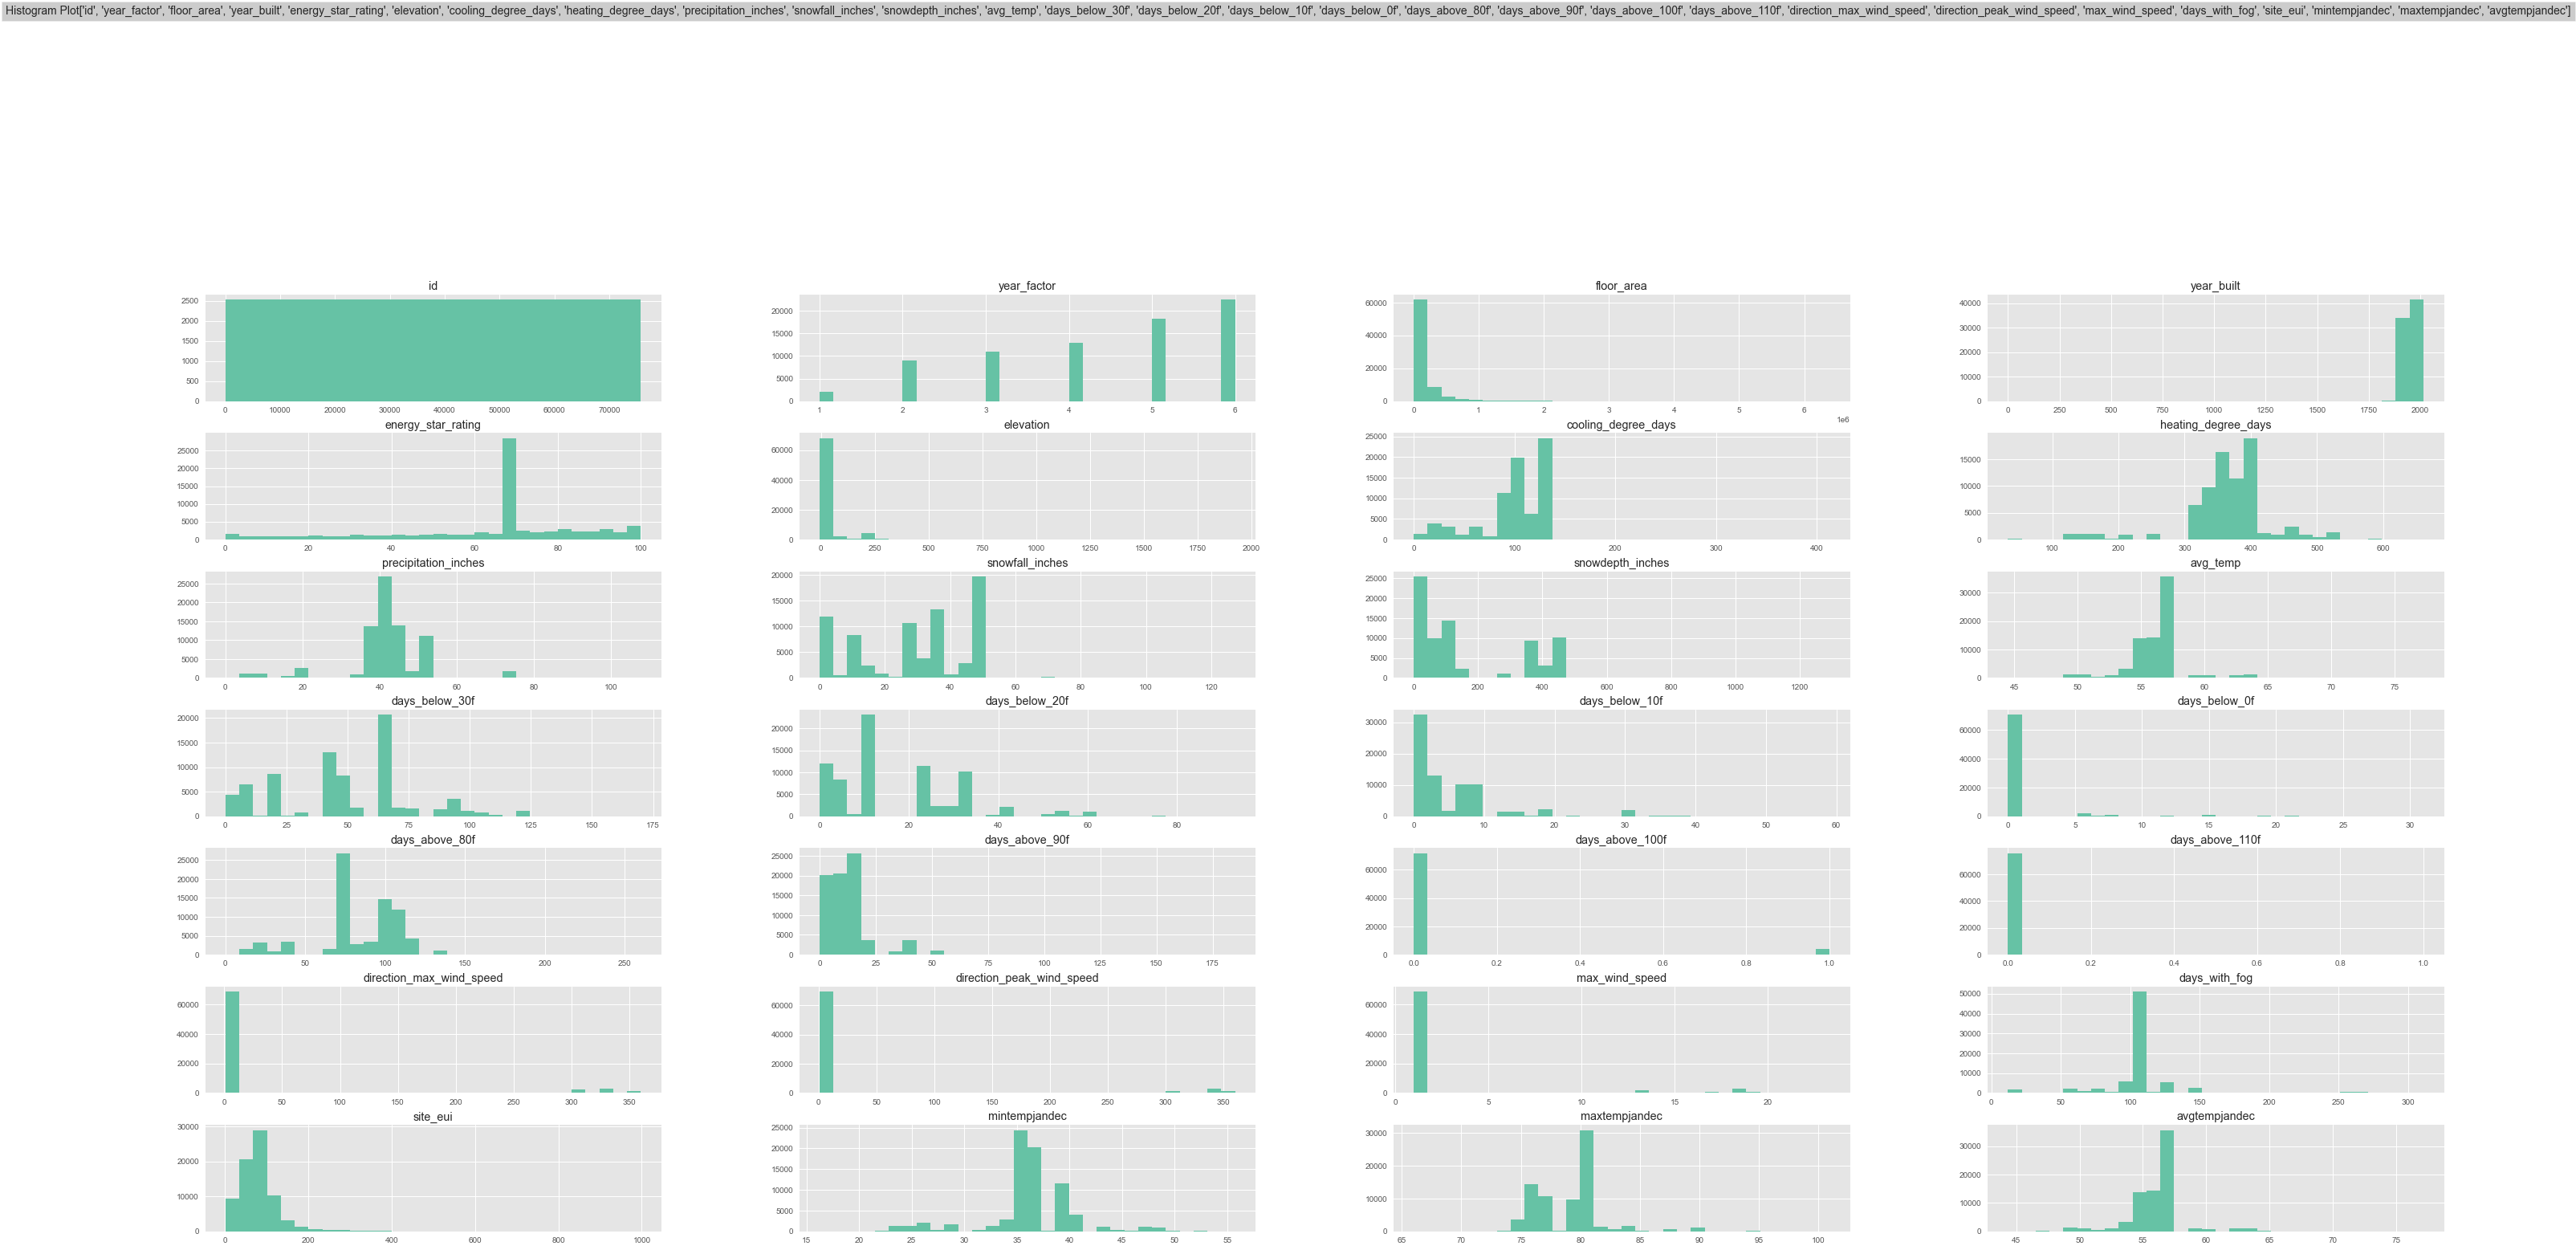

In [70]:
plt.figure(figsize=(50, 50))
df.hist(figsize=(50, 50), grid=True, layout=(16,4), bins = 30)
plt.suptitle("Histogram Plot" + str(fnumcol), bbox={'facecolor':'0.8','pad':5},fontsize = 14)

In [71]:
# Get list of test categorical variables,date  and numerical variables for the data set
fcatcoltest = [col for col in dftest.columns if dftest[col].dtype == "object"]
print("Categorical cols of test dataset = ", fcatcoltest, ". No of categorical features = ", len(fcatcoltest))
print()
fdatecoltest =[col for col in dftest.columns if dftest[col].dtype == "datetime64[ns]"]
print("DateTime cols of test dataset = ", fdatecoltest, ". No of datetime features = ", len(fdatecoltest))
print()
fnumcoltest = [col for col in dftest.columns if (dftest[col].dtype != "object") & (dftest[col].dtype != "datetime64[ns]")]
print("Numerical cols of test dataset = ", fnumcoltest, ". No of numerical features = ", len(fnumcoltest))

Categorical cols of test dataset =  ['state_factor', 'building_class', 'facility_type'] . No of categorical features =  3

DateTime cols of test dataset =  [] . No of datetime features =  0

Numerical cols of test dataset =  ['id', 'year_factor', 'floor_area', 'year_built', 'energy_star_rating', 'elevation', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'mintempjandec', 'maxtempjandec', 'avgtempjandec'] . No of numerical features =  27


In [72]:
import sys
print(sys.executable)

G:\anaconda3\python.exe


In [73]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='site_eui', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'days_above_90f', palette='viridis')
plt.suptitle("countplot for and days_above_90f wrt  site_eui", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000028FF37D0670> (for post_execute):


ValueError: Image size of 4954464x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x504 with 0 Axes>

ValueError: Image size of 4954464x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 4.95446e+06x288 with 2350 Axes>

In [74]:
df.shape

(75757, 31)

In [75]:
dftest.shape

(9705, 30)

<a name = Section7></a>

---
# **7. Data Post-Processing**

<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in fcatcol:   
    print(a)
    df[a]= le.fit_transform(df[a])

state_factor
building_class
facility_type


In [77]:
df.head()

,id,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,mintempjandec,maxtempjandec,avgtempjandec
0,0,1,0,0,13,61242.0,1942.0,11.0,2.4,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,248.68,44.166667,79.833333,56.938333
1,1,1,0,0,55,274000.0,1955.0,45.0,1.8,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,26.50,44.166667,79.833333,56.938333
2,2,1,0,0,48,280025.0,1951.0,97.0,1.8,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,24.69,44.166667,79.833333,56.938333
3,3,1,0,0,6,55325.0,1980.0,46.0,1.8,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,12.0,48.41,44.166667,79.833333,56.938333
4,4,1,0,0,56,66000.0,1985.0,100.0,2.4,9.583333,246.666667,16.59,0.0,0,56.97,0,0,0,0,14,0,0,0,1.0,1.0,1.0,104.0,3.90,44.166667,79.833333,56.938333


In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for b in fcatcoltest:   
    print(b)
    dftest[b]= le.fit_transform(dftest[b])

state_factor
building_class
facility_type


In [79]:
df.columns

Index(['id', 'year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f',
       'direction_max_wind_speed', 'direction_peak_wind_speed',
       'max_wind_speed', 'days_with_fog', 'site_eui', 'mintempjandec',
       'maxtempjandec', 'avgtempjandec'],
      dtype='object')

In [80]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vartrain = df[['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f','mintempjandec',
       'maxtempjandec', 'avgtempjandec']]
vif = pd.DataFrame()
vif['features'] = vartrain.columns
vif['VIF'] = [variance_inflation_factor(
    vartrain.values, i) for i in range(vartrain.shape[1])]
vif

,features,VIF
0,year_factor,5.421917e+01
1,state_factor,8.814234e+01
2,building_class,3.186490e+00
3,facility_type,6.679285e+00
4,floor_area,1.562312e+00
5,year_built,3.028318e+03
6,energy_star_rating,8.683786e+00
7,elevation,2.856802e+00
8,cooling_degree_days,4.675161e+02
9,heating_degree_days,8.081749e+02


In [81]:
X = df.drop(columns = ['id','site_eui','year_factor','year_built', 'energy_star_rating', 
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',  'days_above_90f',
        'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed',
        'days_with_fog','avgtempjandec'], axis = 1)
X.head()

,state_factor,building_class,facility_type,floor_area,elevation,cooling_degree_days,heating_degree_days,max_wind_speed,mintempjandec,maxtempjandec
0,0,0,13,61242.0,2.4,9.583333,246.666667,1.0,44.166667,79.833333
1,0,0,55,274000.0,1.8,9.583333,246.666667,1.0,44.166667,79.833333
2,0,0,48,280025.0,1.8,9.583333,246.666667,1.0,44.166667,79.833333
3,0,0,6,55325.0,1.8,9.583333,246.666667,1.0,44.166667,79.833333
4,0,0,56,66000.0,2.4,9.583333,246.666667,1.0,44.166667,79.833333


In [82]:
X.head()

,state_factor,building_class,facility_type,floor_area,elevation,cooling_degree_days,heating_degree_days,max_wind_speed,mintempjandec,maxtempjandec
0,0,0,13,61242.0,2.4,9.583333,246.666667,1.0,44.166667,79.833333
1,0,0,55,274000.0,1.8,9.583333,246.666667,1.0,44.166667,79.833333
2,0,0,48,280025.0,1.8,9.583333,246.666667,1.0,44.166667,79.833333
3,0,0,6,55325.0,1.8,9.583333,246.666667,1.0,44.166667,79.833333
4,0,0,56,66000.0,2.4,9.583333,246.666667,1.0,44.166667,79.833333


In [83]:
y = df['site_eui']
print(y.isna().sum())
y.head()

0


0    248.68
1     26.50
2     24.69
3     48.41
4      3.90
Name: site_eui, dtype: float64

In [84]:
print(X.shape,y.shape)

(75757, 10) (75757,)


In [85]:
Xnewtest = dftest.drop(columns = ['id','year_factor','year_built', 'energy_star_rating', 
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',  'days_above_90f',
        'days_above_100f', 'days_above_110f', 'direction_max_wind_speed', 'direction_peak_wind_speed',
        'days_with_fog','avgtempjandec'], axis = 1)
Xnewtest.head()

,state_factor,building_class,facility_type,floor_area,elevation,cooling_degree_days,heating_degree_days,max_wind_speed,mintempjandec,maxtempjandec
0,0,0,13,28484.0,2.4,28.5,176.0,18.3,46.166667,81.0
1,0,0,13,21906.0,45.7,28.5,176.0,18.3,46.166667,81.0
2,0,0,13,16138.0,59.1,28.5,176.0,18.3,46.166667,81.0
3,0,0,13,97422.0,35.4,28.5,176.0,18.3,46.166667,81.0
4,0,0,13,61242.0,1.8,28.5,176.0,22.8,46.166667,81.0


In [86]:
Xnewtest.shape

(9705, 10)

In [87]:
print(ynewtest.isna().sum())
print(ynewtest.shape)
ynewtest.head()


id          0
site_eui    0
dtype: int64
(9705, 2)


,id,site_eui
0,75757,166.588554
1,75758,259.381565
2,75759,158.537090
3,75760,261.441520
4,75761,242.967711


In [88]:
ynewtest = ynewtest['site_eui']

In [89]:
print(Xnewtest.shape,ynewtest.shape)

(9705, 10) (9705,)


In [90]:
len(X.columns)

10

In [91]:
Xnewtest.columns

Index(['state_factor', 'building_class', 'facility_type', 'floor_area',
       'elevation', 'cooling_degree_days', 'heating_degree_days',
       'max_wind_speed', 'mintempjandec', 'maxtempjandec'],
      dtype='object')

In [93]:
finalnumcols = ['floor_area', 'elevation', 'cooling_degree_days', 'heating_degree_days', 
               'max_wind_speed', 'mintempjandec', 'maxtempjandec']

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [94]:
# Splitting data into training and testing sets with Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (56817, 10)
y_train shape:  (56817,)
X_test shape:  (18940, 10)
y_test shape:  (18940,)


In [95]:
X_train.head()

,state_factor,building_class,facility_type,floor_area,elevation,cooling_degree_days,heating_degree_days,max_wind_speed,mintempjandec,maxtempjandec
66822,6,0,6,70230.0,12.2,119.750000,384.500000,1.0,35.000000,80.000000
19479,5,1,27,1108700.0,42.7,106.416667,331.500000,1.0,39.000000,80.083333
11197,4,1,24,55466.0,165.5,64.083333,518.833333,1.0,23.750000,75.916667
63760,5,0,6,90100.0,25.0,124.083333,354.333333,1.0,35.333333,80.083333
15423,5,0,32,97554.0,42.7,110.916667,361.250000,1.0,36.833333,80.333333


In [96]:
y.head()

0    248.68
1     26.50
2     24.69
3     48.41
4      3.90
Name: site_eui, dtype: float64

<a name = Section73></a>
### **7.3 Data Scaling**

- Now, evaluating model with help of scaling the data.

In [97]:
sc = StandardScaler()
X_train[finalnumcols] = sc.fit_transform(X_train[finalnumcols])
X_test[finalnumcols] = sc.transform(X_test[finalnumcols])
Xnewtest[finalnumcols] = sc.transform(Xnewtest[finalnumcols])

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop PCA - Considering all components model using default setting.

In [98]:
regressor = RandomForestRegressor(n_estimators=70, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=70, random_state=0)

In [99]:
y_pred = regressor.predict(X_test)
ynewtest = regressor.predict(Xnewtest)

In [100]:
print(" data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 data scores
 --------------------
 RMSE: 47.4261358539578
 MAE: 27.803219716127632
 MSE: 2249.238362038062
 R2: 0.31122532982494544


In [101]:
import joblib
joblib.dump(regressor,'../model/randomforestmodel.pkl')

['../model/randomforestmodel.pkl']

In [102]:
random_clf = joblib.load('../model/randomforestmodel.pkl')
random_clf.predict(X_test)

array([141.578     ,  70.24951429,  82.19914286, ...,  92.66785714,
        96.49178163,  85.76028571])

In [103]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(Xnewtest.shape,ynewtest.shape)

(56817, 10) (56817,)
(18940, 10) (18940,)
(9705, 10) (9705,)


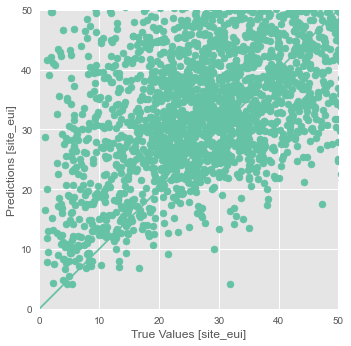

In [104]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [site_eui]')
plt.ylabel('Predictions [site_eui]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [105]:
# Calculate variance score
print('Variance score: %2f' % regressor.score(X_test, y_test))

Variance score: 0.311225


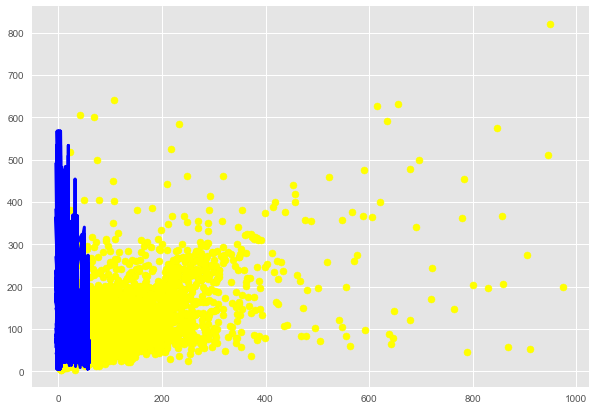

In [106]:
# Plot outputs
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='yellow')
plt.plot(Xnewtest,ynewtest, color='blue', linewidth=3)
#plt.title('Linear Regression Model', fontsize=14)
#plt.xlabel('Independent Variable', fontsize=12)
#plt.ylabel('Dependent Variable', fontsize=12)
plt.show()

ValueError: x and y must be the same size

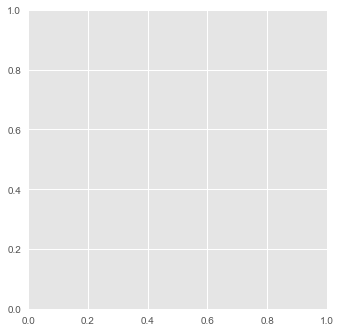

In [107]:
#Visualising the Training results
a = plt.axes(aspect='equal')
plt.scatter(X_train , y_train, color = 'yellow')
plt.plot(X_train , regressor.predict(X_train))
#Visualizing the test results
plt.scatter(X_test , y_test)
plt.plot(y_test , y_pred)

In [108]:
clfs = [GradientBoostingRegressor(), RandomForestRegressor(random_state=42),CatBoostRegressor(random_seed = 23)]

for clf in clfs:

      # Extracting model name
        model_name = type(clf).__name__

        #Calculate start time
        start_time = time.time()

        #Train the model
        clf.fit(X_train, y_train)

        #Make predictions on the test model
        predictions = clf.predict(X_test)

        # Estimating the model performance
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
        R_squared = metrics.r2_score(y_test, predictions)
        MAE = mean_absolute_error(y_test,predictions)
        MSE = mean_squared_error(y_test,predictions)
        # Calculate evaluated time
        elapsed_time = (time.time() - start_time)

        #Display the metrics and time took to develop the model
        print('Performance Metrics of', model_name, ':')
        print('[RMSE]:', RMSE, ',[R-Squared]:', R_squared,',[MAE]:', MAE, ',[MSE]:', MSE, ',[Processing Time]:', elapsed_time, 'seconds')
        print('----------------------------------------------------------------------------\n')

Performance Metrics of GradientBoostingRegressor :
[RMSE]: 49.29259090943908 ,[R-Squared]: 0.2559451060188682 ,[MAE]: 27.918187194096205 ,[MSE]: 2429.759518565316 ,[Processing Time]: 11.228963375091553 seconds
----------------------------------------------------------------------------

Performance Metrics of RandomForestRegressor :
[RMSE]: 47.379223859537476 ,[R-Squared]: 0.3125872713852317 ,[MAE]: 27.72367455694056 ,[MSE]: 2244.7908535321653 ,[Processing Time]: 46.63707685470581 seconds
----------------------------------------------------------------------------

Learning rate set to 0.077515
0:	learn: 57.8601080	total: 437ms	remaining: 7m 16s
1:	learn: 57.2199404	total: 460ms	remaining: 3m 49s
2:	learn: 56.6617700	total: 504ms	remaining: 2m 47s
3:	learn: 56.1593048	total: 522ms	remaining: 2m 10s
4:	learn: 55.6925764	total: 539ms	remaining: 1m 47s
5:	learn: 55.2708247	total: 557ms	remaining: 1m 32s
6:	learn: 54.9348274	total: 576ms	remaining: 1m 21s
7:	learn: 54.7521498	total: 593ms	

149:	learn: 49.7088427	total: 3.54s	remaining: 20s
150:	learn: 49.6927323	total: 3.56s	remaining: 20s
151:	learn: 49.6821905	total: 3.58s	remaining: 20s
152:	learn: 49.6643297	total: 3.59s	remaining: 19.9s
153:	learn: 49.6579795	total: 3.6s	remaining: 19.8s
154:	learn: 49.6480422	total: 3.62s	remaining: 19.8s
155:	learn: 49.6329328	total: 3.64s	remaining: 19.7s
156:	learn: 49.6186179	total: 3.66s	remaining: 19.6s
157:	learn: 49.6050702	total: 3.67s	remaining: 19.6s
158:	learn: 49.5859336	total: 3.69s	remaining: 19.5s
159:	learn: 49.5797294	total: 3.7s	remaining: 19.4s
160:	learn: 49.5625352	total: 3.72s	remaining: 19.4s
161:	learn: 49.5554591	total: 3.74s	remaining: 19.4s
162:	learn: 49.5424171	total: 3.76s	remaining: 19.3s
163:	learn: 49.5304101	total: 3.78s	remaining: 19.3s
164:	learn: 49.5190867	total: 3.79s	remaining: 19.2s
165:	learn: 49.5102537	total: 3.81s	remaining: 19.1s
166:	learn: 49.5030260	total: 3.83s	remaining: 19.1s
167:	learn: 49.4875033	total: 3.85s	remaining: 19s
168

305:	learn: 48.3376670	total: 6.94s	remaining: 15.7s
306:	learn: 48.3264862	total: 6.96s	remaining: 15.7s
307:	learn: 48.3193129	total: 6.98s	remaining: 15.7s
308:	learn: 48.3130069	total: 7s	remaining: 15.7s
309:	learn: 48.3095507	total: 7.02s	remaining: 15.6s
310:	learn: 48.2958326	total: 7.03s	remaining: 15.6s
311:	learn: 48.2917409	total: 7.05s	remaining: 15.5s
312:	learn: 48.2840445	total: 7.07s	remaining: 15.5s
313:	learn: 48.2804279	total: 7.08s	remaining: 15.5s
314:	learn: 48.2596894	total: 7.1s	remaining: 15.4s
315:	learn: 48.2423365	total: 7.12s	remaining: 15.4s
316:	learn: 48.2368299	total: 7.13s	remaining: 15.4s
317:	learn: 48.2346021	total: 7.15s	remaining: 15.3s
318:	learn: 48.2313625	total: 7.17s	remaining: 15.3s
319:	learn: 48.2281306	total: 7.19s	remaining: 15.3s
320:	learn: 48.2187118	total: 7.21s	remaining: 15.2s
321:	learn: 48.2061744	total: 7.22s	remaining: 15.2s
322:	learn: 48.1969059	total: 7.24s	remaining: 15.2s
323:	learn: 48.1862289	total: 7.26s	remaining: 15.

470:	learn: 47.2120224	total: 9.99s	remaining: 11.2s
471:	learn: 47.2038692	total: 10s	remaining: 11.2s
472:	learn: 47.2000020	total: 10s	remaining: 11.2s
473:	learn: 47.1888931	total: 10.1s	remaining: 11.2s
474:	learn: 47.1848213	total: 10.1s	remaining: 11.1s
475:	learn: 47.1803771	total: 10.1s	remaining: 11.1s
476:	learn: 47.1774965	total: 10.1s	remaining: 11.1s
477:	learn: 47.1740760	total: 10.1s	remaining: 11.1s
478:	learn: 47.1686876	total: 10.1s	remaining: 11s
479:	learn: 47.1645766	total: 10.2s	remaining: 11s
480:	learn: 47.1636313	total: 10.2s	remaining: 11s
481:	learn: 47.1495956	total: 10.2s	remaining: 10.9s
482:	learn: 47.1407461	total: 10.2s	remaining: 10.9s
483:	learn: 47.1365283	total: 10.2s	remaining: 10.9s
484:	learn: 47.1308611	total: 10.2s	remaining: 10.9s
485:	learn: 47.1261843	total: 10.3s	remaining: 10.9s
486:	learn: 47.1192325	total: 10.3s	remaining: 10.8s
487:	learn: 47.1142318	total: 10.3s	remaining: 10.8s
488:	learn: 47.1060307	total: 10.3s	remaining: 10.8s
489

626:	learn: 46.4865080	total: 12.9s	remaining: 7.65s
627:	learn: 46.4837955	total: 12.9s	remaining: 7.63s
628:	learn: 46.4803555	total: 12.9s	remaining: 7.61s
629:	learn: 46.4781997	total: 12.9s	remaining: 7.58s
630:	learn: 46.4756598	total: 12.9s	remaining: 7.56s
631:	learn: 46.4725826	total: 12.9s	remaining: 7.54s
632:	learn: 46.4702939	total: 13s	remaining: 7.52s
633:	learn: 46.4668988	total: 13s	remaining: 7.5s
634:	learn: 46.4647651	total: 13s	remaining: 7.47s
635:	learn: 46.4577334	total: 13s	remaining: 7.45s
636:	learn: 46.4522746	total: 13s	remaining: 7.43s
637:	learn: 46.4483654	total: 13.1s	remaining: 7.41s
638:	learn: 46.4439016	total: 13.1s	remaining: 7.39s
639:	learn: 46.4424662	total: 13.1s	remaining: 7.37s
640:	learn: 46.4348965	total: 13.1s	remaining: 7.34s
641:	learn: 46.4328092	total: 13.1s	remaining: 7.32s
642:	learn: 46.4274394	total: 13.1s	remaining: 7.3s
643:	learn: 46.4210147	total: 13.2s	remaining: 7.28s
644:	learn: 46.4102060	total: 13.2s	remaining: 7.25s
645:	

791:	learn: 45.8024412	total: 16.6s	remaining: 4.35s
792:	learn: 45.7988555	total: 16.6s	remaining: 4.33s
793:	learn: 45.7973268	total: 16.6s	remaining: 4.31s
794:	learn: 45.7950407	total: 16.6s	remaining: 4.29s
795:	learn: 45.7921063	total: 16.7s	remaining: 4.27s
796:	learn: 45.7897522	total: 16.7s	remaining: 4.25s
797:	learn: 45.7889315	total: 16.7s	remaining: 4.23s
798:	learn: 45.7812877	total: 16.7s	remaining: 4.2s
799:	learn: 45.7785389	total: 16.7s	remaining: 4.18s
800:	learn: 45.7729422	total: 16.7s	remaining: 4.16s
801:	learn: 45.7679554	total: 16.8s	remaining: 4.14s
802:	learn: 45.7582950	total: 16.8s	remaining: 4.12s
803:	learn: 45.7557549	total: 16.8s	remaining: 4.1s
804:	learn: 45.7530905	total: 16.8s	remaining: 4.08s
805:	learn: 45.7489554	total: 16.8s	remaining: 4.05s
806:	learn: 45.7485169	total: 16.9s	remaining: 4.03s
807:	learn: 45.7464380	total: 16.9s	remaining: 4.01s
808:	learn: 45.7431150	total: 16.9s	remaining: 3.99s
809:	learn: 45.7428287	total: 16.9s	remaining: 3

956:	learn: 45.2694193	total: 19.7s	remaining: 885ms
957:	learn: 45.2689431	total: 19.7s	remaining: 864ms
958:	learn: 45.2675911	total: 19.7s	remaining: 844ms
959:	learn: 45.2591717	total: 19.7s	remaining: 823ms
960:	learn: 45.2542806	total: 19.8s	remaining: 802ms
961:	learn: 45.2526713	total: 19.8s	remaining: 782ms
962:	learn: 45.2466313	total: 19.8s	remaining: 761ms
963:	learn: 45.2449029	total: 19.8s	remaining: 741ms
964:	learn: 45.2442380	total: 19.9s	remaining: 721ms
965:	learn: 45.2421856	total: 19.9s	remaining: 701ms
966:	learn: 45.2405093	total: 20s	remaining: 681ms
967:	learn: 45.2360404	total: 20s	remaining: 661ms
968:	learn: 45.2298452	total: 20s	remaining: 641ms
969:	learn: 45.2282452	total: 20.1s	remaining: 620ms
970:	learn: 45.2260970	total: 20.1s	remaining: 600ms
971:	learn: 45.2226735	total: 20.1s	remaining: 579ms
972:	learn: 45.2170343	total: 20.1s	remaining: 558ms
973:	learn: 45.2141094	total: 20.1s	remaining: 538ms
974:	learn: 45.2130789	total: 20.2s	remaining: 517ms

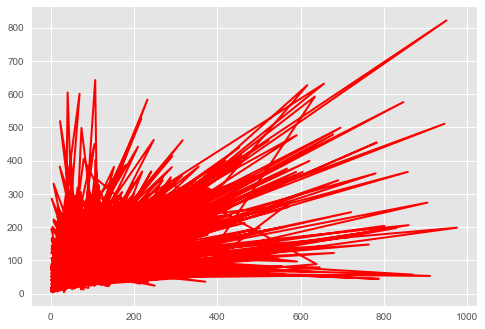

In [109]:
# then, plot 
#plt.scatter(X_test, y_test)
plt.plot(y_test, y_pred, c='red', linewidth=2)

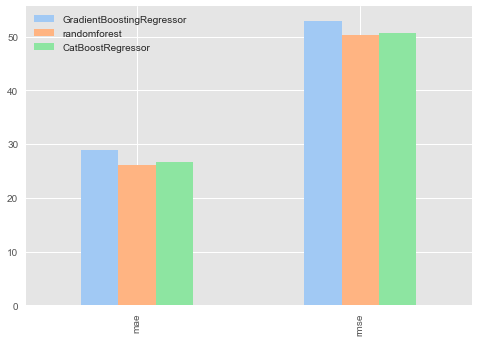

In [110]:
error_rec = {
    "GradientBoostingRegressor": {
        "mae" : 28.854185360223273,
        "rmse": 52.98532705582362,
    },
    "randomforest": {
        "mae" : 26.177109218268825,
        "rmse": 50.23244223527969,
    },
    "CatBoostRegressor": {
        "mae" : 26.68852537865287,
        "rmse": 50.73575784240797 ,
    },
}
pd.DataFrame(error_rec).plot(kind="bar",  color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [111]:
pipe = Pipeline((
("dtr", DecisionTreeRegressor(max_depth=10)),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))
scoresdt = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.37980049420633755
Testing R2
0.27978664104807627
[0.21940476 0.20371202 0.30023785 0.2803165  0.2510673  0.18463529
 0.24830516 0.26419554 0.25543418 0.2374639 ]
Average R2
0.24447724823192113


<a name = Section9></a>

---
# **9. Hyperparameter Tuning**
---

- In this section we will **tune the models**

- Then we will **analyze the results to obtain max accuracy** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

In [ ]:
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures()),
("pt",PowerTransformer()),
("pca",PCA()),
("xb",GradientBoostingRegressor())
))
param_grid = {
    'poly__degree' : [2,3],
    'pca__n_components' : [30,40],
    'xb__n_estimators' : [10,20,30,40,50]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(X_train,y_train)

<a name = Section10></a>

---
# **10. Summary**
---


<a name = Section11></a>

---
# **11. Explainable AI**
---


<a name = Section111></a>
### **11.1 Importing Libraries for  Explainable AI**

In [ ]:
shap.initjs()

In [ ]:
X_train.shape

In [102]:
X_test_sample  = X_test.sample(100)

In [103]:
#x = np.append(x, 25)
X_sample = X_train.sample(100)
X_sample

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,mintempjandec,maxtempjandec,avgtempjandec
73282,6,2,0,0.522265,-0.314155,-0.064624,0.164475,-0.214968,-2.395518,-0.669796,0.248496,-1.552640,-0.933326,-0.459060,-1.545462,-1.203453,-0.689526,-0.302839,-2.276069,-1.009283,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-0.064838,0.973306,-1.307617,-0.416489
52671,6,5,0,1.036753,-0.162673,-2.888116,0.164475,-0.478062,0.731958,-0.087319,-0.021756,0.387983,-0.363647,0.464774,-0.314869,-0.444624,-0.407462,0.040918,0.527671,0.270333,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-0.064838,-0.159036,0.382579,0.480191
37263,4,5,1,0.093525,-0.146558,-0.673613,0.164475,0.054787,-0.186690,0.668688,1.076262,1.173206,1.208667,-0.749153,0.626173,0.452174,0.297696,-0.302839,-0.301604,-0.917882,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-0.064838,-0.139513,-1.000309,-0.754037
40216,4,5,1,0.093525,0.255995,1.430166,0.164475,0.054787,-0.186690,0.668688,1.076262,1.173206,1.208667,-0.749153,0.626173,0.452174,0.297696,-0.302839,-0.301604,-0.917882,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-0.064838,-0.139513,-1.000309,-0.754037
42403,4,5,1,0.093525,-0.473571,-0.673613,-1.301483,-0.599619,-0.186690,0.668688,1.076262,1.173206,1.208667,-0.749153,0.626173,0.452174,0.297696,-0.302839,-0.301604,-0.917882,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-1.565589,-0.139513,-1.000309,-0.754037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62350,6,5,1,0.093525,-0.259710,-1.337964,-0.611621,0.054787,0.731958,-0.087319,-0.021756,0.387983,-0.363647,0.464774,-0.314869,-0.444624,-0.407462,0.040918,0.527671,0.270333,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,0.779335,-0.159036,0.382579,0.480191
22235,2,5,1,0.093525,-0.170678,0.184507,0.164475,0.054787,0.192475,-0.419817,-0.367603,-1.092723,-0.882055,0.531719,-0.966359,-0.858531,-0.689526,-0.302839,-0.420072,0.270333,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-0.221166,0.699982,0.382579,0.542974
59282,6,5,0,0.522265,-0.436930,-1.254920,0.207591,0.054787,0.731958,-0.087319,-0.021756,0.387983,-0.363647,0.464774,-0.314869,-0.444624,-0.407462,0.040918,0.527671,0.270333,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,0.779335,-0.159036,0.382579,0.480191
40819,4,5,1,0.093525,-0.178289,0.295233,-2.120695,-0.599619,-0.186690,0.668688,1.076262,1.173206,1.208667,-0.749153,0.626173,0.452174,0.297696,-0.302839,-0.301604,-0.917882,-0.124029,-0.016041,-0.318017,-0.299165,-0.314741,-1.565589,-0.139513,-1.000309,-0.754037


In [104]:
X_sample.shape

(100, 29)

In [105]:
#shap_values = shap.TreeExplainer(regressor).shap_values(X_sample)
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X_sample)

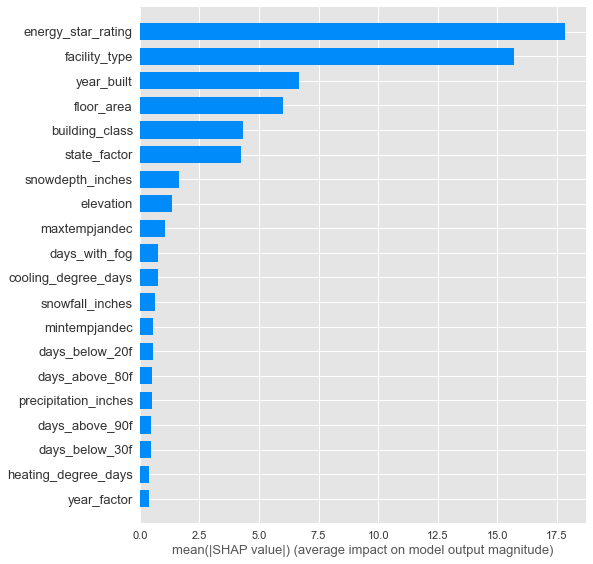

In [106]:
shap.summary_plot(shap_values, X_test_sample, feature_names=X_test_sample.columns, plot_type="bar")

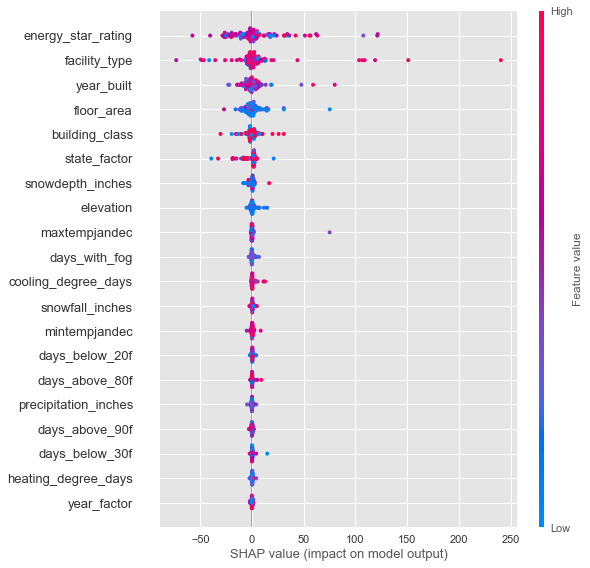

In [107]:
shap.summary_plot(shap_values, X_test_sample)

In [108]:
y_hat = regressor.predict(X_test_sample._get_numeric_data())
print(y_hat[50])

132.55814285714283


In [16]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(regressor).expected_value, shap_values[50], X_test_sample.iloc[50])

NameError: name 'regressor' is not defined

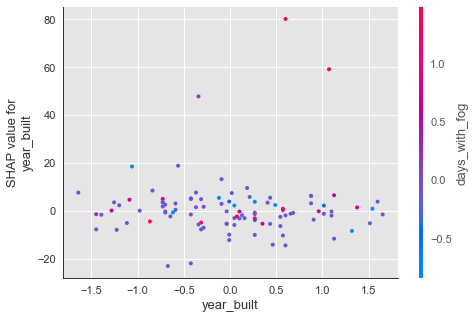

In [111]:
shap.dependence_plot(5, shap_values, X_test_sample, feature_names=X_test_sample.columns)